In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ENTROPY
• this is a measure of disorder.
• Value: between 0 (= order) and 1 (total disorder)

In [10]:
def entropy(column: pd.Series, base=None):
# Determine the fractions for all column values v
    fracties = column.value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(fracties * np.log(fracties) / np.log(base)).sum()

# INFORMATION GAIN
• Reflects the gain in terms of order
• The greater, the less disorder

In [11]:
def information_gain(df: pd.DataFrame, s: str, target: str):
    # calculate entropy of parent table
    entropy_parent = entropy(df[target])
    child_entropies = []
    child_weights = []
    # compute entropies of child tables
    for (label, p) in df[s].value_counts().items():
        child_df = df[df[s] == label]
        child_entropies.append(entropy(child_df[target]))
        child_weights.append(int(p))
    # calculate the difference between parent entropy and weighted child entropies
    return entropy_parent - np.average(child_entropies, weights=child_weights)

# SPLIT

In [12]:
def best_split(df:pd.DataFrame, target: str):
    # retrieve all non-target column labels (the features))
    features = df.drop(axis=1,labels=target).columns
    # calculate the information gains for these features
    gains = [information_gain(df,feature,target) for feature in features]
    # return column with highest information gain
    return features[np.argmax(gains)], max(gains)

# EXAMPLES
------------------------------------------

In [13]:
simpsons = pd.read_csv("The Simpsons.csv")
entropy(simpsons.gender)

0.9910760598382221

In [14]:
for label in simpsons.drop(labels='gender', axis=1).columns:
    print('{}: {}'.format(label, information_gain(simpsons, label, 'gender')))

name: 0.9910760598382221
hair length: 0.45165906291896163
weight: 0.5900048960119098
age: 0.07278022578373256


In [15]:
simpsons

,name,hair length,weight,age,gender
0,Homer,<3,>160,30-40,M
1,Marge,>5,<=160,30-40,F
2,Bart,<3,<=160,<30,M
3,Lisa,>5,<=160,<30,F
4,Maggie,3-5,<=160,<30,F
5,Abe,<3,>160,>40,M
6,Selma,>5,<=160,>40,F
7,Otto,>5,>160,30-40,M
8,Krusty,>5,>160,>40,M


In [16]:
import graphviz
import six
import sys
sys.modules['sklearn.externals.six']=six
from id3 import Id3Estimator, export_graphviz,export_text
model = Id3Estimator()
X = simpsons.drop(['name', 'gender'], axis=1).values.tolist()
y = simpsons['gender'].values.tolist()
model.fit(X,y)
print(export_text(model.tree_,feature_names=simpsons.drop(['name','gender'],axis=1).columns))

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [ ]:
export_graphviz(model.tree_,'tree.dot', feature_names=
simpsons.drop(['name', 'gender'], axis=1).columns)

In [ ]:
# >>> # visualize decision tree
# >>> graphviz.Source.from_file('tree.dot’)
# >>>! dot -Tpng tree.dot -o tree.png
# >>> img = plt.imread('tree.png')
# >>> plt.figure(figsize = (20, 20))
# >>> plt.imshow(img)
# >>> plt.show()

In [ ]:
Z = np.array([['>5', '>160', '30-40']])
model.predict(Z)

In [ ]:
model.predict(X)

In [ ]:
100* (model.predict(X) == simpsons.gender.count()/len(X))

[Text(0.6, 0.8333333333333334, 'weight <= 165.0\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = cluster M'),
 Text(0.4, 0.5, 'hair length <= 3.0\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = cluster F'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = cluster M'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = cluster F'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = cluster M')]

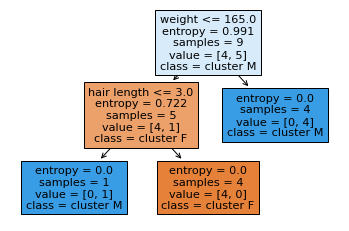

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
simpsons = pd.read_csv("The Simpsons original.csv")
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['gender', 'name'], axis=1), simpsons['gender'])
tree.plot_tree(classifier, feature_names=simpsons.drop(['gender', 'name'],axis=1).columns.values, class_names=['cluster {}'.format(i)
for i in np.unique(simpsons['gender'])],filled=True)

In [21]:
studenq = pd.read_csv('Questionnaire 21-22.csv',delimiter=';', decimal=',')
fruit_preferences = pd.DataFrame(zip(*studenq['Favorite Fruit'].apply(split_choices).apply(split_preferences).apply(sort_preferences)),
index=range(1,11)).transpose()
fruit_pref_trans = transform_preference(fruit_preferences)
fruit_pref_trans = fruit_pref_trans.dropna(axis='columns')
fruit_pref_trans.to_csv('fruit_table2122.csv', sep=';')
total= fruit_pref_trans.sum(axis=1)

NameError: name 'split_choices' is not defined